In [1]:
# 5.2_one_way_range_sensitivty_analysis.py
""" One-way range sensitivity analysis """
from EngFinancialPy import OneWayRangeSensit
import numpy_financial as npf

In [2]:
# Uncertain variable names and their [low, base, high] values
v_data = { 'I'  : [ 10350, 11500, 13225 ],
           'A'  : [  1800,  3000,  3750 ],
           'SV' : [   900,  1000,  1100 ],
           'N'  : [     5,     6,     7 ] }

# Fixed parameters name and value
f_data = {'marr' : 0.1 }

In [3]:
# Objective functions, one for each alternative. 
# Arguments must be in the same order as above
def npv_invest(I, A, SV, N, marr):
    return -I - npf.pv(marr, N, A, SV)
def npv_no_invest(I, A, SV, N, marr):
    return 0

In [4]:
# The alternative names and their objective functions 
obj_fns = { 'Invest' : npv_invest,
            'Do not invest' : npv_no_invest }

# Label for the objective function outputs
obj_label = 'NPV($)'

In [5]:
# Perform one-way range sensitivity analysis
Pj = OneWayRangeSensit(v_data, f_data, obj_fns, obj_label)

In [6]:
# Show the base case scenario base values
Pj.base_values()


Variable base values:
  I = 11,500.00
  A = 3,000.00
  SV = 1,000.00
  N = 6.00
Objective base values:
  Invest =  2,130.26
  Do not invest =  0.00


{'Invest': 2130.256028440461, 'Do not invest': 0}

In [7]:
# Show sensitivity range tables
Pj.sensit_table()


One-Way Range Sensitivty Tables:

Invest:
  I         :  10,350.00  11,500.00  13,225.00 |     3,280.26       405.26 |    2,875.00
  A         :   1,800.00   3,000.00   3,750.00 |    -3,096.06     5,396.70 |    8,492.76
  SV        :     900.00   1,000.00   1,100.00 |     2,073.81     2,186.70 |      112.89
  N         :       5.00       6.00       7.00 |       493.28     3,618.41 |    3,125.13

Do not invest:
  I         :  10,350.00  11,500.00  13,225.00 |         0.00         0.00 |        0.00
  A         :   1,800.00   3,000.00   3,750.00 |         0.00         0.00 |        0.00
  SV        :     900.00   1,000.00   1,100.00 |         0.00         0.00 |        0.00
  N         :       5.00       6.00       7.00 |         0.00         0.00 |        0.00


{'Invest': {'I': [3280.256028440461, 405.2560284404608, -2875.0],
  'A': [-3096.0568109142114, 5396.701553037132, 8492.758363951343],
  'SV': [2073.8086354350835, 2186.70342144584, 112.89478601075643],
  'N': [493.28163128450615, 3618.4145713095113, 3125.132940025005]},
 'Do not invest': {'I': [0, 0, 0],
  'A': [0, 0, 0],
  'SV': [0, 0, 0],
  'N': [0, 0, 0]}}

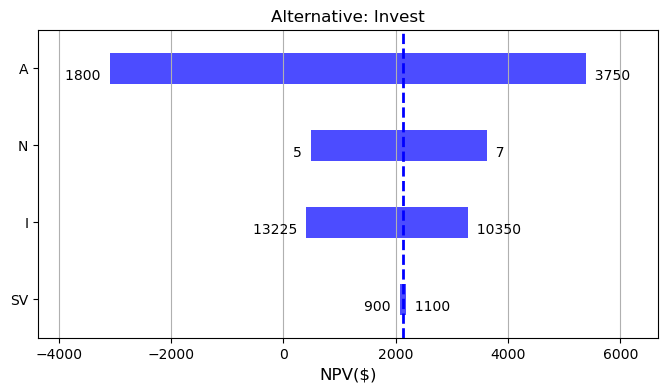

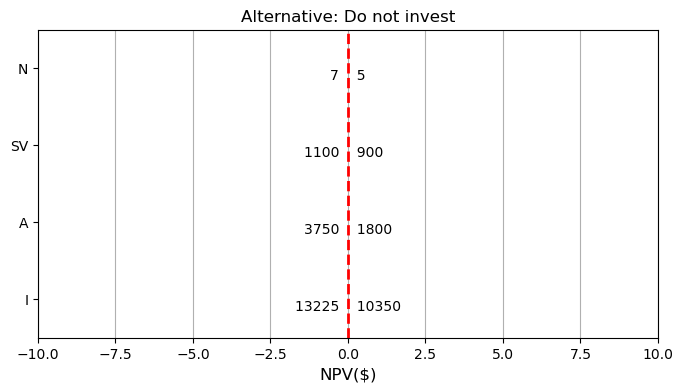

In [8]:
# Generate individual tornado diagram
Pj.tornados()

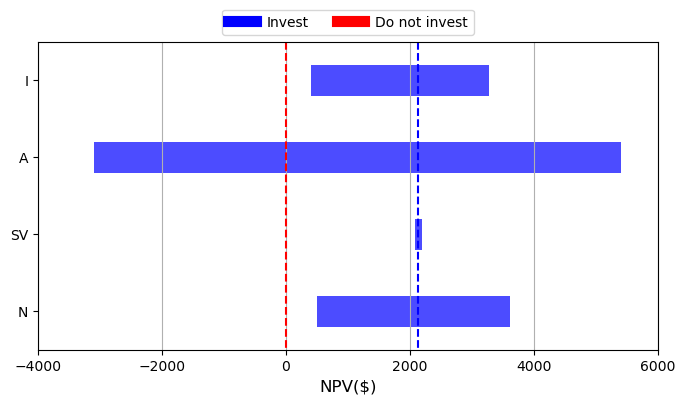

In [9]:
# Plot combined tornados
Pj.combined_tornados(xlim=(-4000,6000), annotate=False)

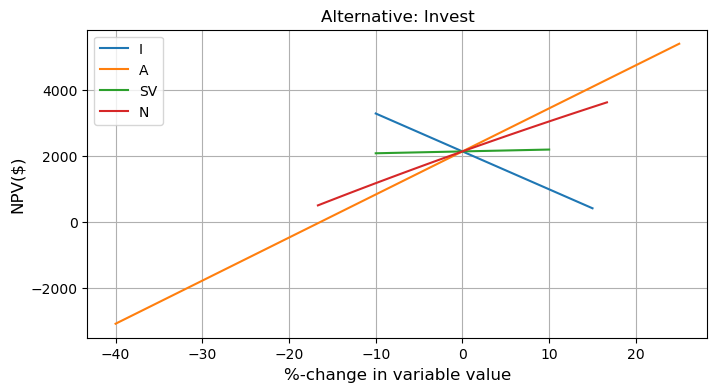

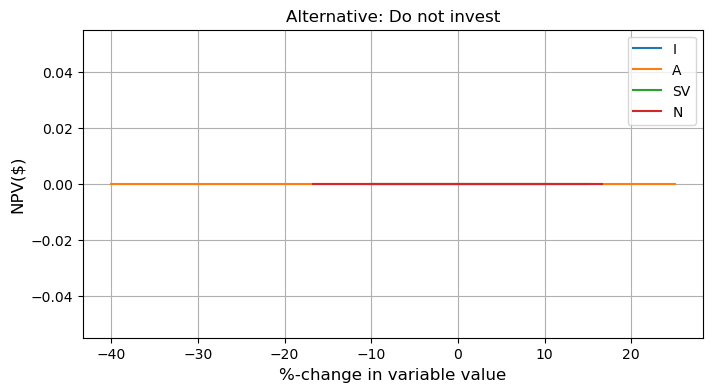

In [10]:
# Plot spider diagrams
Pj.spiders()